In [187]:
#Link com os arquivos Google Drive
#https://drive.google.com/drive/folders/1w2Gxt_r2nJCH1DCbCcypzwH67DkYB3P9?usp=drive_link

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import warnings

warnings.filterwarnings("ignore")

# Cosumo de vinho por País em 2016 + Previsões de consumo por pessoa para 2020 e 2025

In [189]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [190]:
df = pd.read_csv(r'/content/drive/MyDrive/Pós Tech - Data Analytics/Exportação de vinho - Tech Challenge/bases/alcohol-consumption.csv')

In [191]:
df.shape

(189, 10)

In [192]:
df.head()

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 189 non-null    object 
 1   total_consumption       189 non-null    float64
 2   recorded_consumption    189 non-null    float64
 3   unrecorded_consumption  189 non-null    float64
 4   beer_percentage         179 non-null    float64
 5   wine_percentage         179 non-null    float64
 6   spirits_percentage      179 non-null    float64
 7   other_percentage        179 non-null    float64
 8   2020_projection         189 non-null    float64
 9   2025_projection         189 non-null    float64
dtypes: float64(9), object(1)
memory usage: 14.9+ KB


In [194]:
df = df.drop(['beer_percentage' , 'spirits_percentage' , 'other_percentage'] , axis=1)

In [195]:
df.shape

(189, 7)

In [196]:
df.head()

,country,total_consumption,recorded_consumption,unrecorded_consumption,wine_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,7.4,11.5,11.9
1,Lithuania,15.0,13.8,1.2,7.3,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,21.3,11.2,11.4
3,Seychelles,13.8,12.4,1.4,22.4,10.4,10.6
4,Germany,13.4,11.3,1.4,28.4,12.8,12.6


In [197]:
df = df.sort_values(by=['wine_percentage'], ascending=False)

In [198]:
df.head()

,country,total_consumption,recorded_consumption,unrecorded_consumption,wine_percentage,2020_projection,2025_projection
151,Tuvalu,1.7,1.2,0.5,84.7,1.7,1.7
86,São Tomé and Príncipe,6.8,4.9,2.0,80.2,7.1,7.4
166,Indonesia,0.8,0.3,0.5,76.4,1.1,1.6
78,Italy,7.5,7.1,0.5,64.8,7.0,6.1
14,Luxembourg,12.3,10.6,2.1,61.5,11.8,11.0


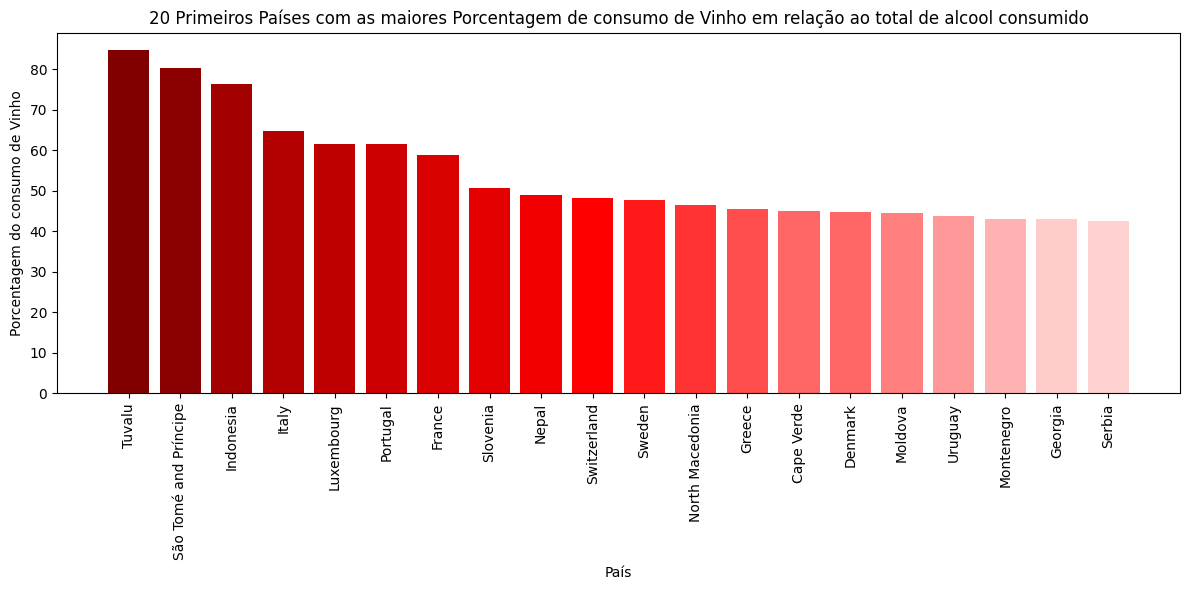

In [199]:
# Selecionar os 20 primeiros países
top_20 = df.head(20)

cores = [
'#800000','#8B0000','#A30000','#B30000','#BF0000','#CC0000','#D90000',
'#E50000','#F20000','#FF0000','#FF1919','#FF3333','#FF4C4C','#FF6666',
'#FF6666','#FF7F7F','#FF9999','#FFB2B2','#FFCCCC','#FFD1D1']


plt.figure(figsize=(12, 6))
plt.bar(top_20['country'], top_20['wine_percentage'] , color=cores)
plt.xlabel('País')
plt.ylabel('Porcentagem do consumo de Vinho')
plt.title('20 Primeiros Países com as maiores Porcentagem de consumo de Vinho em relação ao total de alcool consumido')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [200]:
top_20 = top_20 [::-1]

In [201]:
cores = cores[::-1]

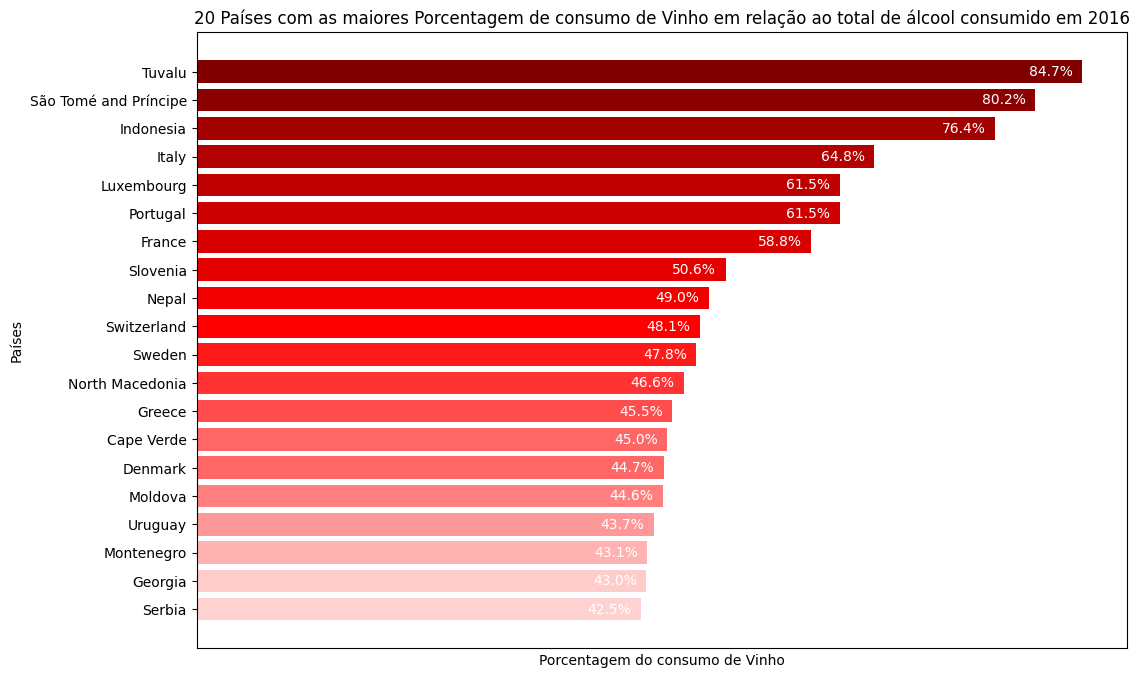

In [202]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(top_20['country'], top_20['wine_percentage'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)
plt.xlabel('Porcentagem do consumo de Vinho')
plt.ylabel('Países')
plt.title('20 Países com as maiores Porcentagem de consumo de Vinho em relação ao total de álcool consumido em 2016')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade

for bar, media, pais in zip(bars, top_20['wine_percentage'], top_20['country']):
   plt.text(bar[0].get_width() - 3 , bar[0].get_y() + bar[0].get_height()/2, str(media)+ '%', ha='center', va='center', color='white')


plt.xticks([])
plt.show()

In [203]:
df = df.sort_values(by=['2020_projection'], ascending=False)

In [204]:
top_20_projection_2020 = df.head(20)
top_20_projection_2020 = top_20_projection_2020[::-1]

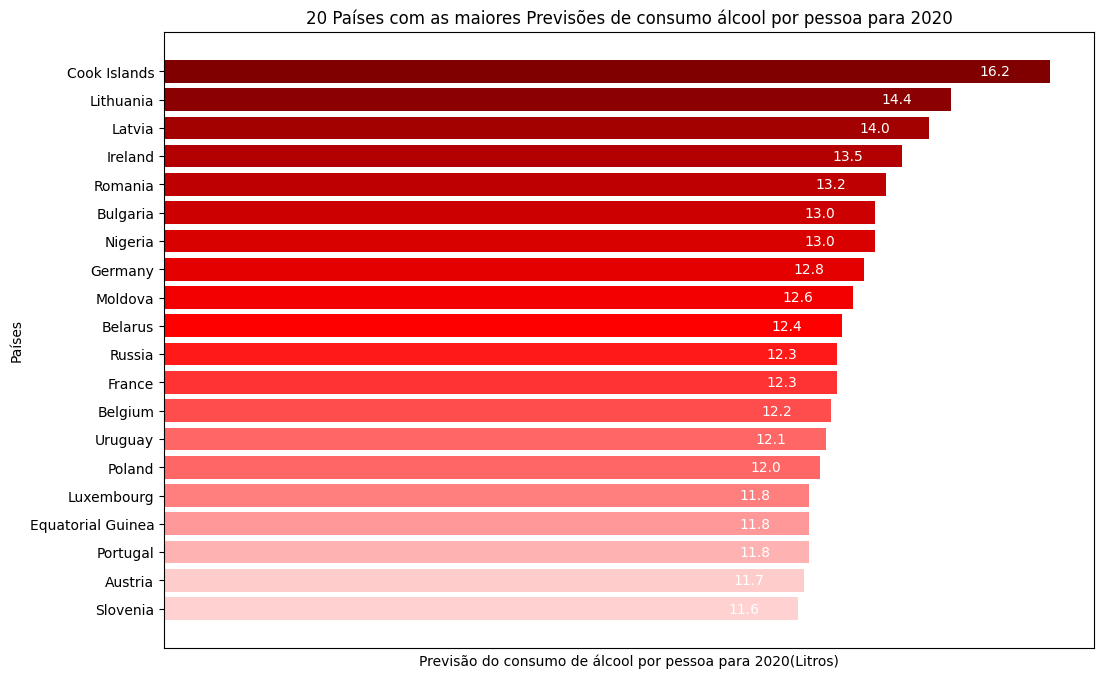

In [205]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(top_20_projection_2020['country'], top_20_projection_2020['2020_projection'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)
plt.xlabel('Previsão do consumo de álcool por pessoa para 2020(Litros)')
plt.ylabel('Países')
plt.title('20 Países com as maiores Previsões de consumo álcool por pessoa para 2020')
plt.xticks(rotation=90)

for bar, media, pais in zip(bars, top_20_projection_2020['2020_projection'], top_20_projection_2020['country']):
   plt.text(bar[0].get_width() - 1 , bar[0].get_y() + bar[0].get_height()/2, str(media) , ha='center', va='center', color='white')


plt.xticks([])
plt.show()

In [206]:
df = df.sort_values(by=['2025_projection'], ascending=False)

In [207]:
top_20_projection_2025 = df.head(20)
top_20_projection_2025 = top_20_projection_2025[::-1]

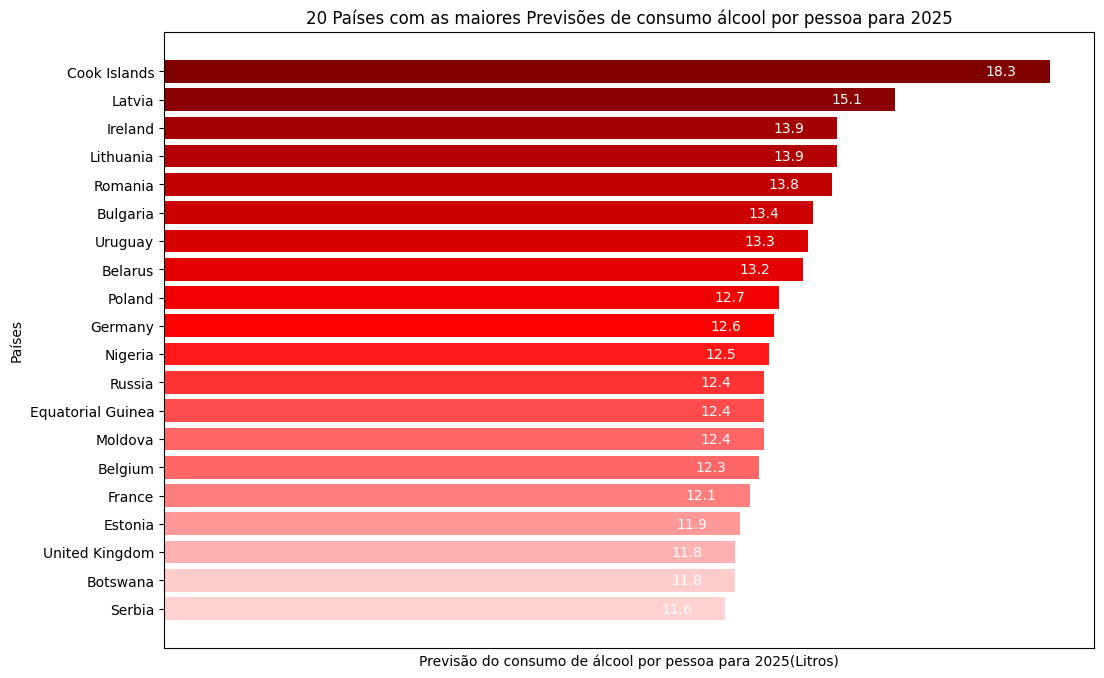

In [208]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(top_20_projection_2025['country'], top_20_projection_2025['2025_projection'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)
plt.xlabel('Previsão do consumo de álcool por pessoa para 2025(Litros)')
plt.ylabel('Países')
plt.title('20 Países com as maiores Previsões de consumo álcool por pessoa para 2025')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade

for bar, media, pais in zip(bars, top_20_projection_2025['2025_projection'], top_20_projection_2025['country']):
   plt.text(bar[0].get_width() - 1 , bar[0].get_y() + bar[0].get_height()/2, str(media) , ha='center', va='center', color='white')


plt.xticks([])
plt.show()

# Base Importação de vinho EMBRAPA

In [209]:
df = pd.read_csv(r'/content/drive/MyDrive/Pós Tech - Data Analytics/Exportação de vinho - Tech Challenge/bases/ImpVinhos.csv' , sep=';')

In [210]:
df.shape

(66, 108)

In [211]:
df.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Africa do Sul,0,0.0,0,0,0,0,0,0,...,1127053,3574371,1092042,3604038,627150,1701072,859169,2508140,738116.0,2266827.0
1,2,Alemanha,52297,30498.0,34606,26027,134438,92103,111523,98638,...,142971,516975,101055,412794,136992,504168,106541,546967,92600.0,438595.0
2,3,Argélia,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,4,Arábia Saudita,0,0.0,0,0,0,0,0,0,...,563,3249,0,0,0,0,2510,8761,0.0,0.0
4,5,Argentina,19525,12260.0,24942,15022,104906,58137,116887,76121,...,15221318,52817642,16548931,54527380,22610267,66322932,26869241,79527959,27980574.0,87519642.0


In [212]:
def rename_columns(col):
    if col.endswith('.1') and col != 'País':
        return col[:-2] + '_valor'
    elif col != 'País':
        return col + '_quantidade'
    else:
        return col

df.columns = df.columns.to_series().apply(rename_columns)

In [213]:
df = df.drop(columns=[col for col in df.columns if col.startswith('19')])

In [214]:
df = df.drop('Id_quantidade', axis=1)

In [215]:
df = df.drop([col for col in df.columns if col.startswith(('2000', '2001', '2002', '2003', '2004', '2005', '2006'))], axis=1)

In [216]:
df_quantidade = df.filter(regex='_quantidade$')

In [217]:
df_quantidade['País'] = df['País']

In [218]:
df_quantidade = df_quantidade.set_index('País')

In [219]:
df_quantidade['media_quantidade'] = df_quantidade.mean(axis=1)

In [220]:
df_quantidade['media_quantidade'] = df_quantidade['media_quantidade'].astype(int)

In [221]:
df_quantidade = df_quantidade.sort_values(by=['media_quantidade'], ascending=False)

In [222]:
df_quantidade_top_20 = df_quantidade.head(20)

In [223]:
df_quantidade_top_20 = df_quantidade_top_20[::-1]

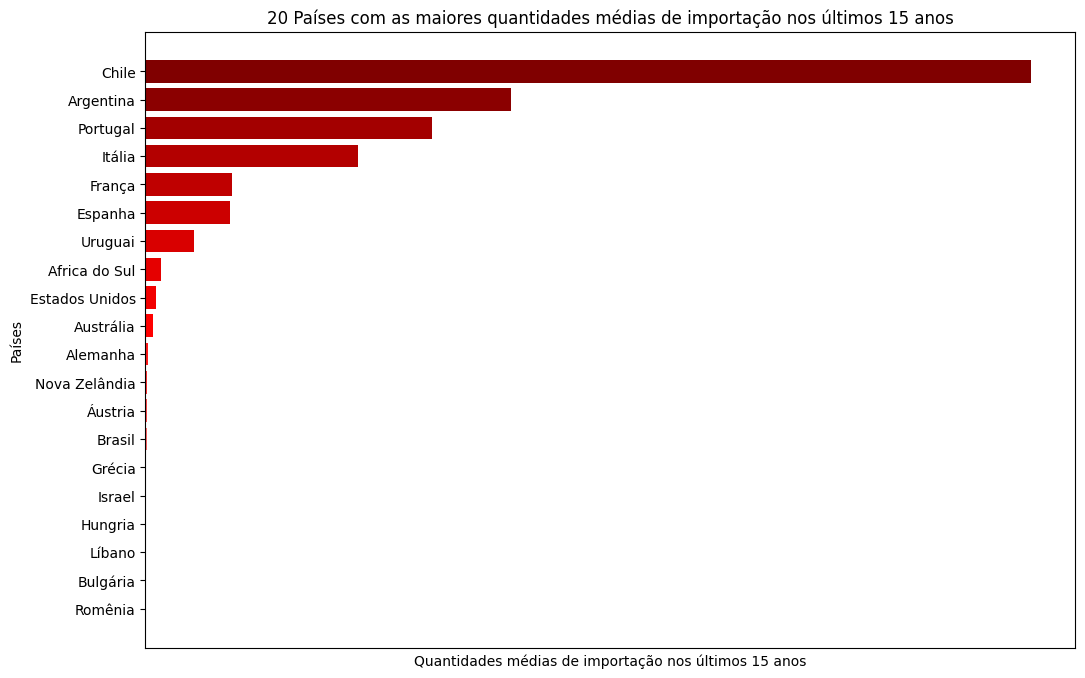

In [224]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(df_quantidade_top_20.index, df_quantidade_top_20['media_quantidade'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)
plt.xlabel('Quantidades médias de importação nos últimos 15 anos')
plt.ylabel('Países')
plt.title('20 Países com as maiores quantidades médias de importação nos últimos 15 anos')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade


plt.xticks([])
plt.show()

In [225]:
df_valor = df.filter(regex='_valor$')

In [226]:

df_valor['País'] = df['País']

In [227]:
df_valor = df_valor.set_index('País')

In [228]:
df_valor['media_valor'] = df_valor.mean(axis=1)

In [229]:
df_valor['media_valor'] = df_valor['media_valor'].astype(int)

In [230]:
df_valor = df_valor.sort_values(by=['media_valor'], ascending=False)

In [231]:
df_valor_top_20 = df_valor.head(20)

In [232]:
df_valor_top_20 = df_valor_top_20[::-1]

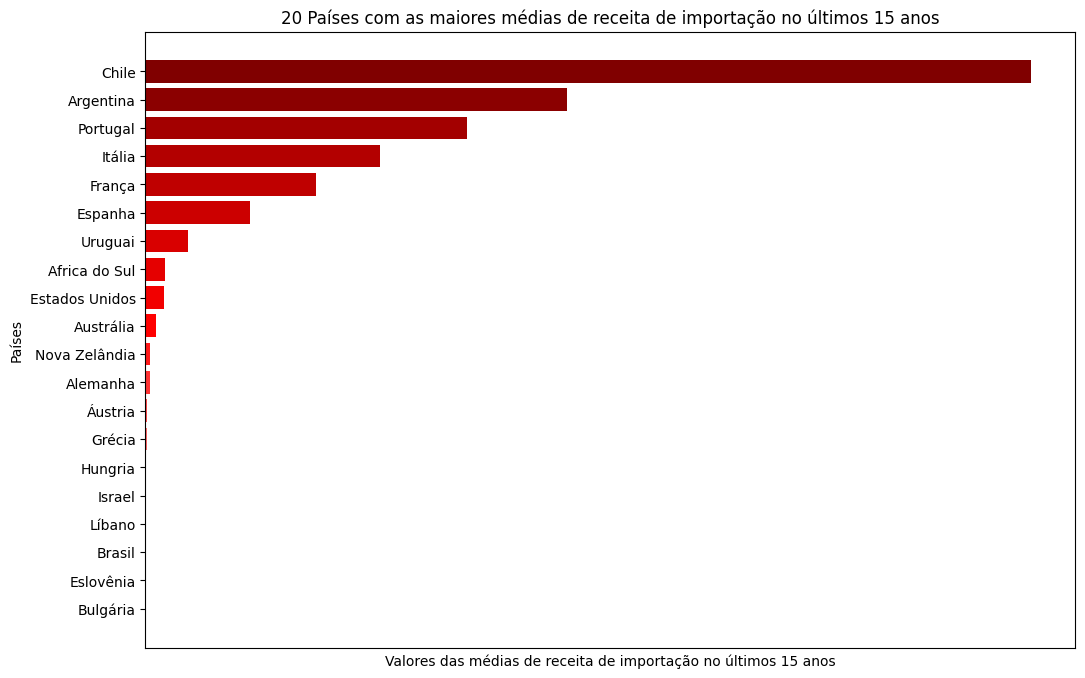

In [233]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(df_valor_top_20.index, df_valor_top_20['media_valor'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)
plt.xlabel('Valores das médias de receita de importação no últimos 15 anos')
plt.ylabel('Países')
plt.title('20 Países com as maiores médias de receita de importação no últimos 15 anos')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade

plt.xticks([])
plt.show()

# Base Exportação de vinho EMBRAPA

In [234]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [235]:
df =pd.read_csv("/content/drive/MyDrive/Pós Tech - Data Analytics/Exportação de vinho - Tech Challenge/bases/ExpVinho.csv", sep=";")
df.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
df.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
def rename_columns(col):
    if col.endswith('.1') and col != 'País':
        return col[:-2] + '_valor'
    elif col != 'País':
        return col + '_quantidade'
    else:
        return col

df.columns = df.columns.to_series().apply(rename_columns)

In [238]:
df = df.drop(columns=[col for col in df.columns if col.startswith('19')])

In [239]:
df = df.drop('Id_quantidade', axis=1)

In [240]:
df = df.drop([col for col in df.columns if col.startswith(('2000', '2001', '2002', '2003', '2004', '2005', '2006'))], axis=1)

In [241]:
df_quantidade = df.filter(regex='_quantidade$')

In [242]:
df_quantidade['País'] = df['País']

In [243]:
df_quantidade = df_quantidade.set_index('País')

In [244]:
df_quantidade['media_quantidade'] = df_quantidade.mean(axis=1)

In [245]:
df_quantidade['media_quantidade'] = df_quantidade['media_quantidade'].astype(int)

In [246]:
df_quantidade = df_quantidade.sort_values(by=['media_quantidade'], ascending=False)

In [247]:
df_quantidade_top_20 = df_quantidade.head(20)

In [248]:
df_quantidade_top_20.rename(index={'Alemanha, República Democrática': 'Alemanha'}, inplace=True)

In [249]:
df_quantidade_top_20.head()

,2007_quantidade,2008_quantidade,2009_quantidade,2010_quantidade,2011_quantidade,2012_quantidade,2013_quantidade,2014_quantidade,2015_quantidade,2016_quantidade,2017_quantidade,2018_quantidade,2019_quantidade,2020_quantidade,2021_quantidade,2022_quantidade,media_quantidade
País,,,,,,,,,,,,,,,,,
Rússia,266400,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,66046,2456012
Paraguai,1285459,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670,1906264
Estados Unidos,479269,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085,220373,252664
China,7638,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852,122253,61884,105395,157318
Espanha,0,2942,2181,0,5206,0,1972980,0,0,0,0,6123,3540,28,0,0,124562


In [250]:
df_quantidade_top_20 = df_quantidade_top_20[::-1]

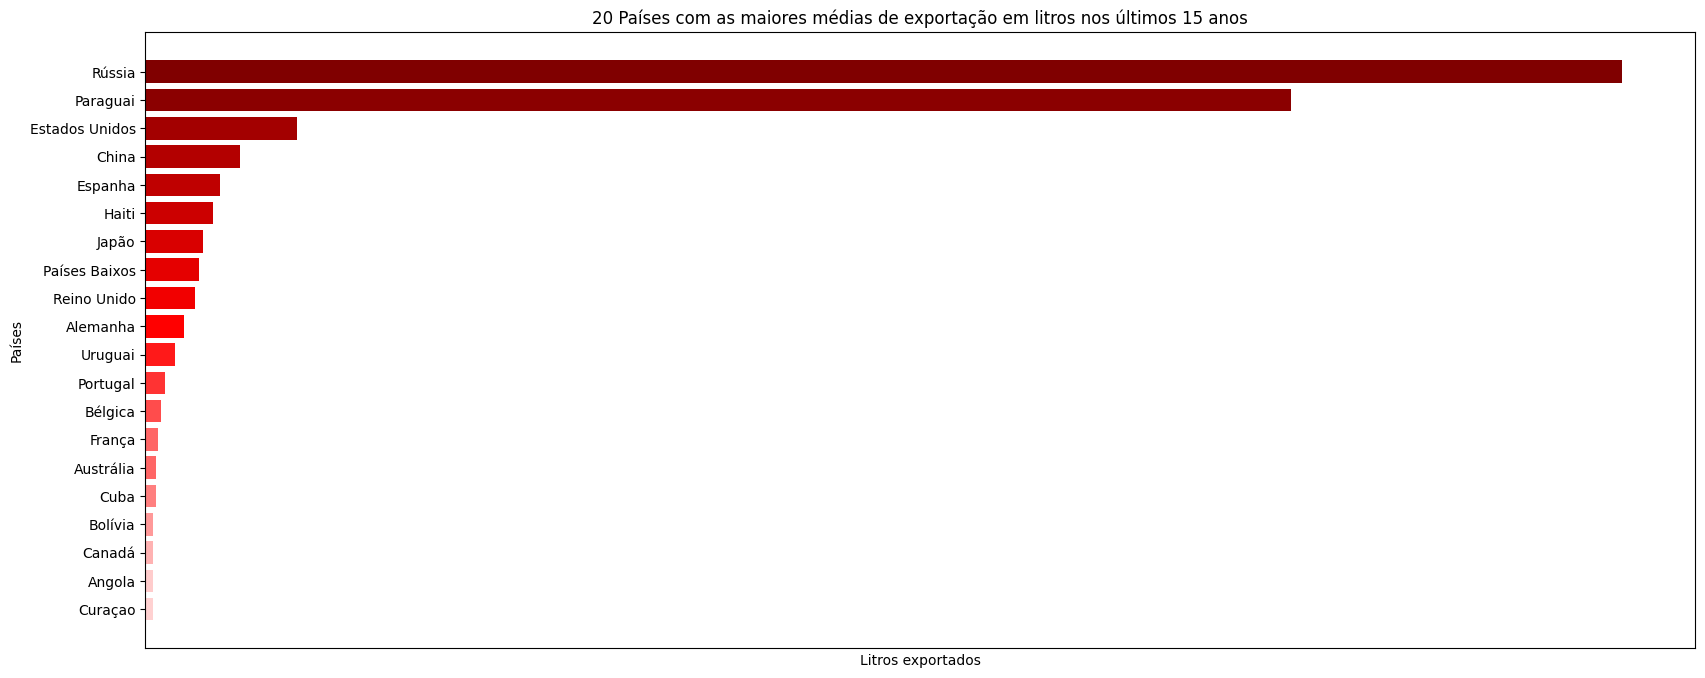

In [251]:
plt.figure(figsize=(20, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(df_quantidade_top_20.index, df_quantidade_top_20['media_quantidade'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)
plt.xlabel('Litros exportados')
plt.ylabel('Países')
plt.title('20 Países com as maiores médias de exportação em litros nos últimos 15 anos')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade


plt.xticks([])
plt.show()

In [252]:
#Quantidade total exportada nos últimos 15 anos
df_quantidade_top_20['total_quantidade'] = df_quantidade_top_20.sum(axis=1)
df_quantidade_total = df_quantidade_top_20
df_quantidade_total = df_quantidade_total['total_quantidade'].sum()
df_quantidade_total

94395284

In [253]:
#Quantidade total exportada em 2022
df_quantidade_2022 = df_quantidade_top_20
df_quantidade_2022 = df_quantidade_top_20["2022_quantidade"].sum()
df_quantidade_2022

6818261

In [254]:
df_valor = df.filter(regex='_valor$')

In [255]:

df_valor['País'] = df['País']

In [256]:
df_valor = df_valor.set_index('País')

In [257]:
df_valor['media_valor'] = df_valor.mean(axis=1)

In [258]:
df_valor['media_valor'] = df_valor['media_valor'].astype(int)

In [259]:
df_valor = df_valor.sort_values(by=['media_valor'], ascending=False)

In [260]:
df_valor_top_20 = df_valor.head(20)

In [261]:
df_valor_top_20.rename(index={'Alemanha, República Democrática': 'Alemanha'}, inplace=True)

In [262]:
df_valor_top_20

,2007_valor,2008_valor,2009_valor,2010_valor,2011_valor,2012_valor,2013_valor,2014_valor,2015_valor,2016_valor,2017_valor,2018_valor,2019_valor,2020_valor,2021_valor,2022_valor,media_valor
País,,,,,,,,,,,,,,,,,
Paraguai,801519,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293,2470034
Rússia,173160,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,118618,1604852
Estados Unidos,810038,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,447893,655912
Reino Unido,144244,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,138154,303481
China,30390,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,404647,298557
Países Baixos,364751,783635,136991,302182,395356,539641,255690,773767,186464,190203,0,32395,148031,1532,8484,37240,259772
Espanha,0,6834,4050,0,24618,0,3748940,0,0,0,0,22631,1353,126,0,0,238034
Alemanha,238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,174027
Japão,316867,178333,283436,74628,144662,116961,429088,401774,87853,90954,92886,112342,99642,92674,90275,82208,168411


In [263]:
df_valor_top_20 = df_valor_top_20[::-1]

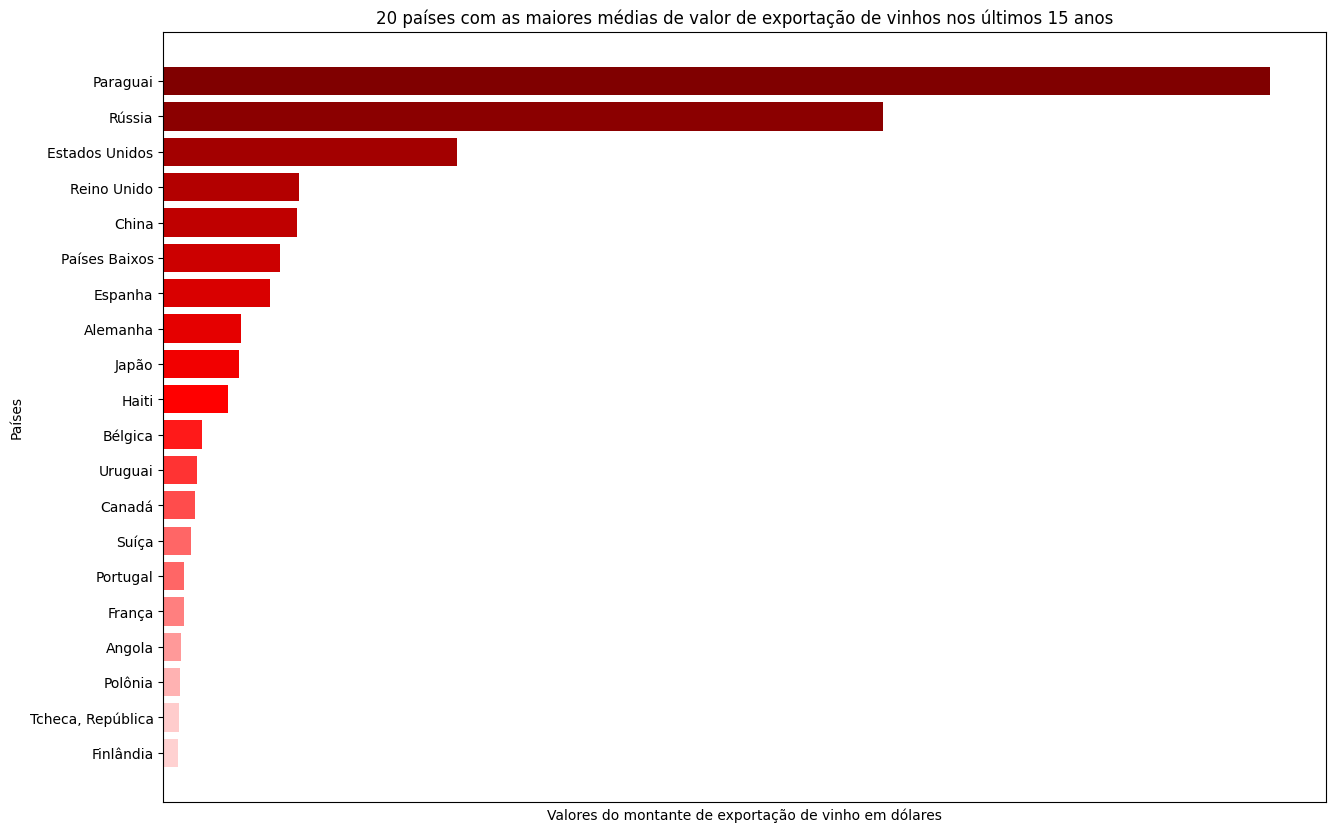

In [264]:
plt.figure(figsize=(15, 10))
bars = []
for i, (pais, media, cor) in enumerate(zip(df_valor_top_20.index, df_valor_top_20['media_valor'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)
plt.xlabel('Valores do montante de exportação de vinho em dólares')
plt.ylabel('Países')
plt.title('20 países com as maiores médias de valor de exportação de vinhos nos últimos 15 anos')
plt.xticks(rotation=90)

plt.xticks([])
plt.show()

In [265]:
#Receita total de vinho exportado nos últimos 15 anos
df_valor_top_20['total_valor'] = df_valor_top_20.sum(axis=1)
df_valor_total = df_valor_top_20
df_valor_total = df_valor_total['total_valor'].sum()
df_valor_total

116457876

In [266]:
#Receita total de vinho exportado e 2022
df_valor_2022 = df_valor_top_20
df_valor_2022 = df_valor_top_20["2022_valor"].sum()
df_valor_2022

10248972

# Análise no ano de 2016

In [267]:
df = pd.read_csv(r'/content/drive/MyDrive/Pós Tech - Data Analytics/Exportação de vinho - Tech Challenge/bases/ExpVinho.csv' , sep=';')

In [268]:
df.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [269]:
def rename_columns(col):
    if col.endswith('.1') and col != 'País':
        return col[:-2] + '_valor'
    elif col != 'País':
        return col + '_quantidade'
    else:
        return col

df.columns = df.columns.to_series().apply(rename_columns)

In [270]:
df.head()

,Id_quantidade,País,1970_quantidade,1970_valor,1971_quantidade,1971_valor,1972_quantidade,1972_valor,1973_quantidade,1973_valor,...,2018_quantidade,2018_valor,2019_quantidade,2019_valor,2020_quantidade,2020_valor,2021_quantidade,2021_valor,2022_quantidade,2022_valor
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
df = df[['País' , '2016_quantidade' , '2016_valor']]

In [272]:
df

,País,2016_quantidade,2016_valor
0,Afeganistão,0,0
1,África do Sul,0,0
2,"Alemanha, República Democrática",14012,68109
3,Angola,7359,35390
4,Anguilla,0,0
...,...,...,...
123,Tuvalu,0,0
124,Uruguai,0,0
125,Vanuatu,0,0
126,Venezuela,0,0


In [273]:
df['2016_quantidade'] = df['2016_quantidade'].astype(int)

In [274]:
df['2016_valor'] = df['2016_valor'].astype(int)

In [275]:
df_valor = df.sort_values(by=['2016_valor'], ascending=False)

In [276]:
df_quantidade = df.sort_values(by=['2016_quantidade'], ascending=False)

In [277]:
df_valor_top_20 = df_valor.head(20)

In [278]:
df_quantidade_top_20 = df_quantidade.head(20)

In [279]:
df_quantidade_top_20 = df_quantidade_top_20[::-1]

In [280]:
df_valor_top_20 = df_valor_top_20[::-1]

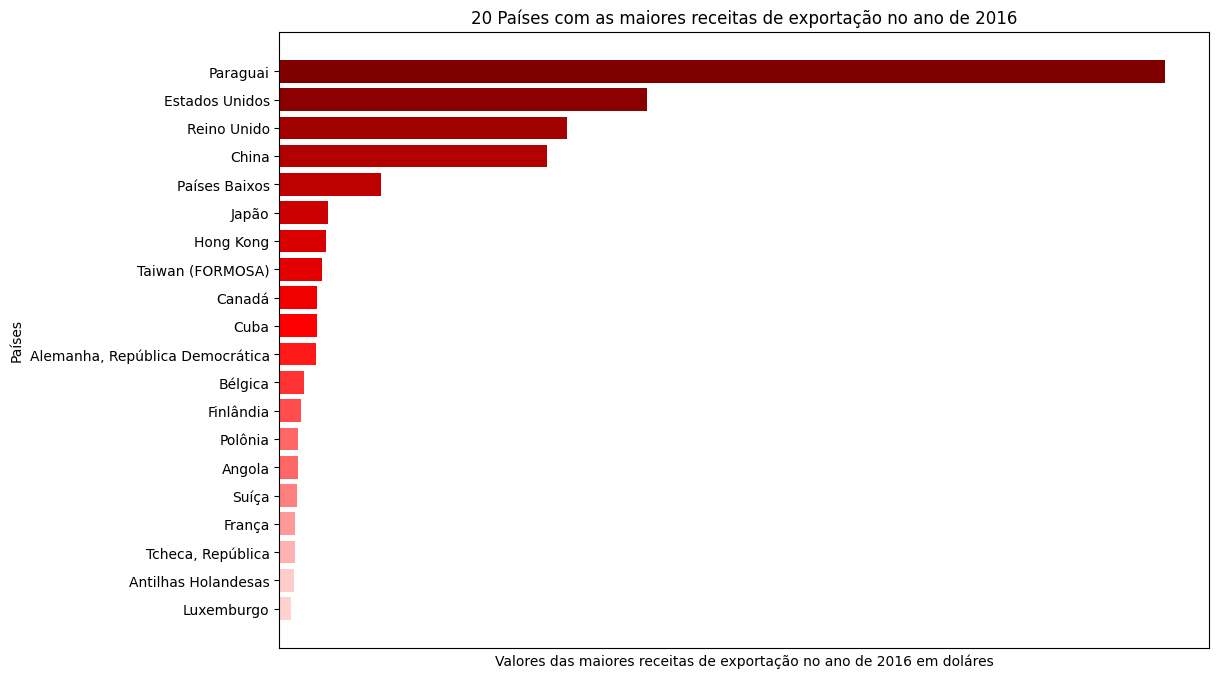

In [281]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(df_valor_top_20['País'], df_valor_top_20['2016_valor'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)
plt.xlabel('Valores das maiores receitas de exportação no ano de 2016 em doláres')
plt.ylabel('Países')
plt.title('20 Países com as maiores receitas de exportação no ano de 2016')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade


plt.xticks([])
plt.show()

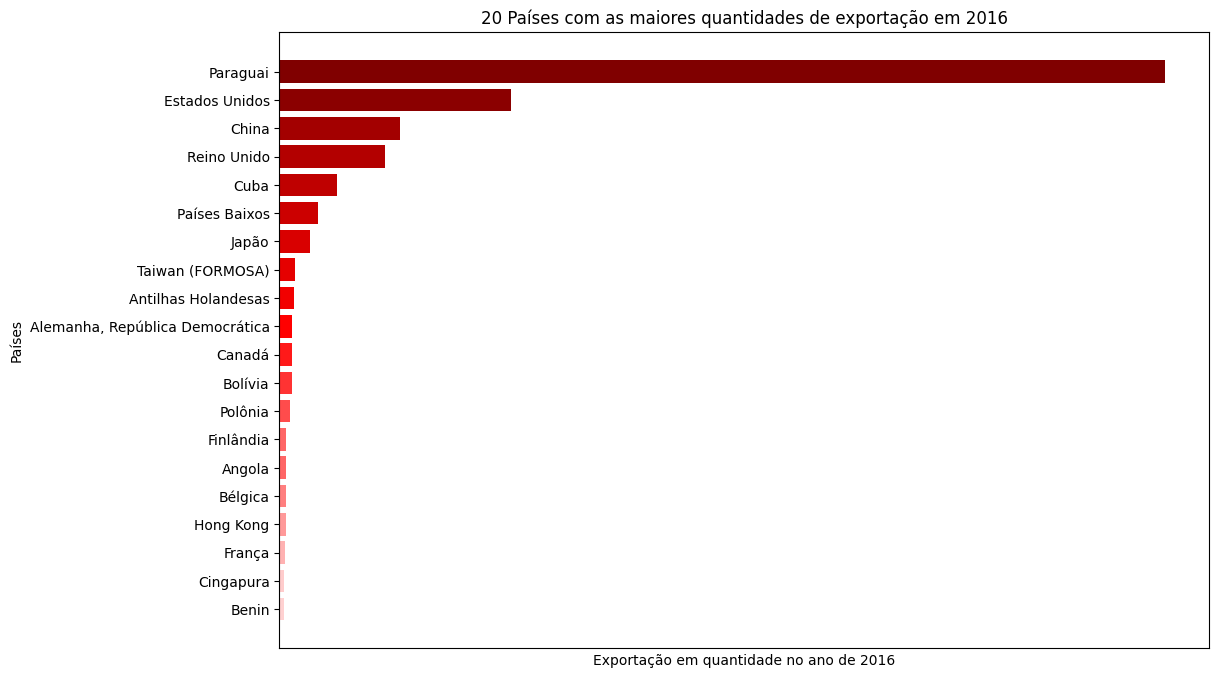

In [282]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(df_quantidade_top_20['País'], df_quantidade_top_20['2016_quantidade'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)
plt.xlabel('Exportação em quantidade no ano de 2016')
plt.ylabel('Países')
plt.title('20 Países com as maiores quantidades de exportação em 2016')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade


plt.xticks([])
plt.show()

In [283]:
df = pd.read_csv(r'/content/drive/MyDrive/Pós Tech - Data Analytics/Exportação de vinho - Tech Challenge/bases/alcohol-consumption.csv')

In [284]:
df = df.drop(['beer_percentage' , 'spirits_percentage' , 'other_percentage'] , axis=1)

In [285]:
df = df.sort_values(by=['wine_percentage'], ascending=False)

In [286]:
df_top_20 = df.head(20)

In [287]:
df_top_20 = df_top_20[::-1]

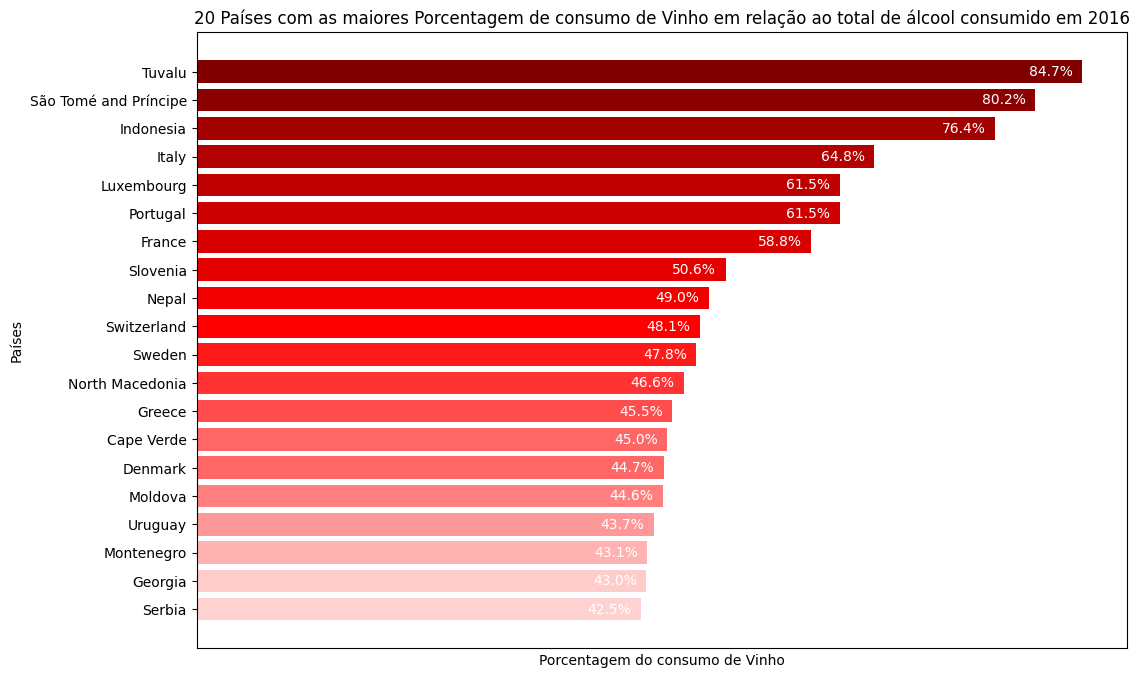

In [288]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(df_top_20['country'], df_top_20['wine_percentage'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)
plt.xlabel('Porcentagem do consumo de Vinho')
plt.ylabel('Países')
plt.title('20 Países com as maiores Porcentagem de consumo de Vinho em relação ao total de álcool consumido em 2016')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade

for bar, media, pais in zip(bars, df_top_20['wine_percentage'], df_top_20['country']):
   plt.text(bar[0].get_width() - 3 , bar[0].get_y() + bar[0].get_height()/2, str(media) + '%', ha='center', va='center', color='white')


plt.xticks([])
plt.show()

# Análise de avaliações de vinhos no mundo

In [289]:
df = pd.read_csv(r'/content/drive/MyDrive/Pós Tech - Data Analytics/Exportação de vinho - Tech Challenge/bases/winemag-data_first150k.csv')

In [290]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [291]:
df_pais_unico = df.groupby('country')['points'].max().reset_index()

In [292]:
df_pais_unico.head()

,country,points
0,Albania,88
1,Argentina,97
2,Australia,100
3,Austria,98
4,Bosnia and Herzegovina,88


In [293]:
df_pais_unico = df_pais_unico.sort_values(by=['points'], ascending=False)

In [294]:
df_top_20 = df_pais_unico.head(20)

In [295]:
df_top_20.head()

,country,points
22,Italy,100
2,Australia,100
44,US,100
15,France,100
33,Portugal,99


In [296]:
df_top_20 = df_top_20[::-1]

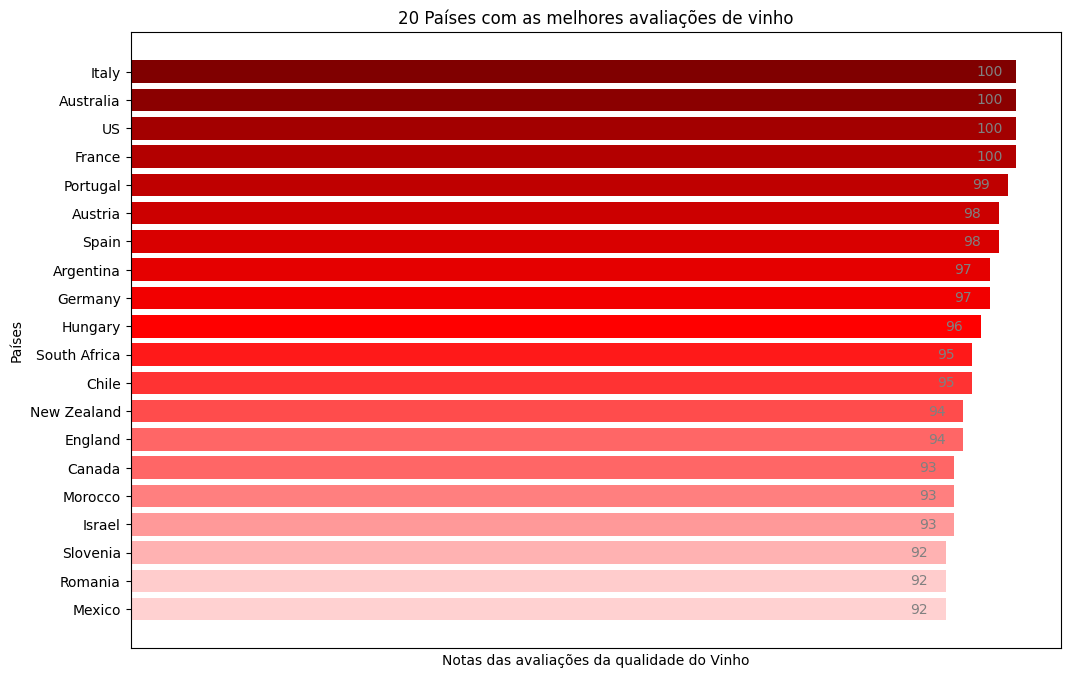

In [297]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(df_top_20['country'], df_top_20['points'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)
plt.xlabel('Notas das avaliações da qualidade do Vinho')
plt.ylabel('Países')
plt.title('20 Países com as melhores avaliações de vinho')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade

for bar, media, pais in zip(bars, df_top_20['points'], df_top_20['country']):
   plt.text(bar[0].get_width() - 3 , bar[0].get_y() + bar[0].get_height()/2, str(media), ha='center', va='center', color='grey')


plt.xticks([])
plt.show()

#Dados de Produção

In [298]:
dados = pd.read_csv("/content/drive/MyDrive/Pós Tech - Data Analytics/Exportação de vinho - Tech Challenge/bases/Producao.csv", sep=";")

In [299]:
dados.head()

,id,produto,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,195359778,...,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611
1,2,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,154801826,...,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214
2,3,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,4954387,...,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430
3,4,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,35603565,...,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968
4,5,VINHO FINO DE MESA (VINÍFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,41264971,...,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796


In [300]:
dados = dados.drop(columns=['id'])

In [301]:
dados = dados.set_index("produto")
dados.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
produto,,,,,,,,,,,,,,,,,,,,,
VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,195359778,200053669,211252982,...,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611
Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,154801826,162917363,154736439,...,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214
Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,4954387,5079748,7146395,...,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430
Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,35603565,32056558,49370148,...,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968
VINHO FINO DE MESA (VINÍFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,41264971,36750933,46129710,...,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796


In [302]:
colunas_remover = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007']

In [303]:
dados = dados.drop(columns=colunas_remover)

In [304]:
linhas_remover = ['Tinto', 'Branco', 'Rosado',
       'VINHO FINO DE MESA (VINÍFERA)', 'Tinto', 'Branco', 'Rosado', 'SUCO',
       'Suco de uva integral', 'Suco de uva concentrado',
       'Suco de uva adoçado', 'Suco de uva orgânico',
       'Suco de uva reconstituído', 'DERIVADOS', 'Espumante',
       'Espumante moscatel', 'Base espumante', 'Base espumante moscatel',
       'Base Champenoise champanha', 'Base Charmat champanha', 'Bebida de uva',
       'Polpa de uva', 'Mosto simples', 'Mosto concentrado',
       'Mosto de uva com bagaço', 'Mosto dessulfitado', 'Mistelas',
       'Néctar de uva', 'Licorosos', 'Compostos', 'Jeropiga', 'Filtrado',
       'Frisante', 'Vinho leve', 'Vinho licoroso', 'Brandy', 'Destilado',
       'Bagaceira', 'Licor de bagaceira', 'Vinagre', 'Borra líquida',
       'Borra seca', 'Vinho Composto', 'Pisco', 'Vinho orgânico',
       'Espumante orgânico', 'Destilado alcoólico simples de bagaceira ',
       'Vinho acidificado ', 'Mosto parcialmente fermentado ',
       'Outros derivados']

In [305]:
dados = dados.drop(index=linhas_remover)

In [306]:
dados_melted = dados.melt(var_name='Ano', value_name='Quantidade')
print(dados_melted)

     Ano  Quantidade
0   2008   287506811
1   2009   205418206
2   2010   195267980
3   2011   257840749
4   2012   212777037
5   2013   196904222
6   2014   196173123
7   2015   210308560
8   2016    86319015
9   2017   255015187
10  2018   218375636
11  2019   144629737
12  2020   124200414
13  2021   173899995
14  2022   195031611


In [307]:
soma_quantidade= dados_melted['Quantidade'].sum()
print(soma_quantidade / 1000)

2959668.283


In [308]:
dados_melted['Quantidade'] = dados_melted['Quantidade'] / 1_000_000
print(dados_melted)


     Ano  Quantidade
0   2008  287.506811
1   2009  205.418206
2   2010  195.267980
3   2011  257.840749
4   2012  212.777037
5   2013  196.904222
6   2014  196.173123
7   2015  210.308560
8   2016   86.319015
9   2017  255.015187
10  2018  218.375636
11  2019  144.629737
12  2020  124.200414
13  2021  173.899995
14  2022  195.031611


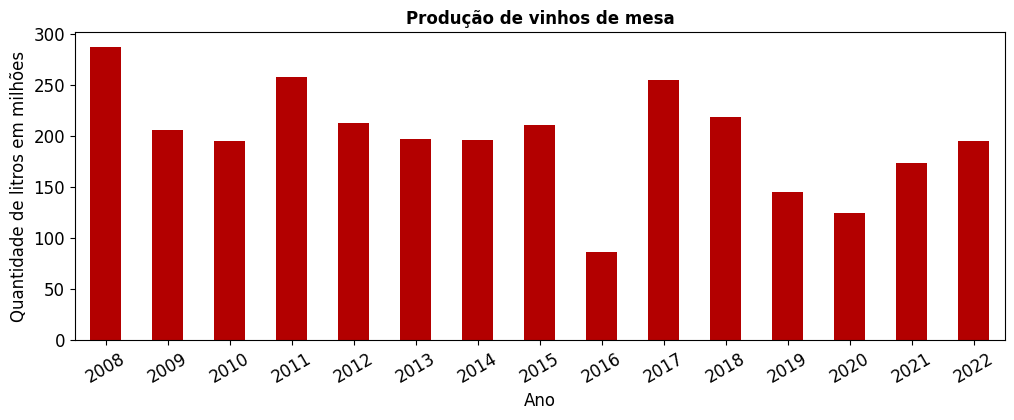

In [309]:
#, colormap='PiYG'
axis = dados_melted.plot(x='Ano',fontsize=10,figsize=(12,4), kind='bar', color='#B30000',legend=False,width=0.5)
plt.xticks(rotation=30,fontfamily='sans-serif',fontsize=12)
plt.yticks(fontfamily='sans-serif',fontsize=12)
#axis.yaxis.set_minor_formatter(ticker.StrMethodFormatter("{x:.0f}"))
#axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.3f}"))
axis.set_ylabel("Quantidade de litros em milhões",fontsize=12,fontfamily='sans-serif')
axis.set_xlabel("Ano",fontsize=12, fontfamily='sans-serif')
#plt.ylim(0,310000)
plt.title("Produção de vinhos de mesa",fontsize=12,fontweight='bold', fontfamily='sans-serif')
plt.show()


In [310]:
#Quantidade total do úlimos 15 anos de vinhos de mesa produzido
soma_quantidade= dados_melted['Quantidade'].sum()
print(soma_quantidade)

2959.6682829999995


In [311]:
#Quantidade produzida de vinho de mesa no ano 2022
qtd_produzida2022 = (dados_melted.loc[dados_melted['Ano'] == '2022'])
print(qtd_produzida2022)

     Ano  Quantidade
14  2022  195.031611
